# 

# Merge and transform mapping data

In [1]:
import pandas as pd
import numpy as np
from bioinfokit.analys import norm, get_data
import seaborn as sns
import matplotlib.pyplot as plt

mapping_data_folder='/home/davidmartins/Documentos/Viral_analysis/contig_mapping'

samples = [
    f'{mapping_data_folder}/IT1_A_vs_marabaviralDB_idxstats.txt',
    f'{mapping_data_folder}/IT1_B_vs_marabaviralDB_idxstats.txt',
    f'{mapping_data_folder}/IT1_C_vs_marabaviralDB_idxstats.txt',
    f'{mapping_data_folder}/IT2_A_vs_marabaviralDB_idxstats.txt',
    f'{mapping_data_folder}/IT2_B_vs_marabaviralDB_idxstats.txt',
    f'{mapping_data_folder}/IT2_C_vs_marabaviralDB_idxstats.txt',
    f'{mapping_data_folder}/IT3_A_vs_marabaviralDB_idxstats.txt',
    f'{mapping_data_folder}/IT3_B_vs_marabaviralDB_idxstats.txt',
    f'{mapping_data_folder}/IT3_C_vs_marabaviralDB_idxstats.txt',
    f'{mapping_data_folder}/IT4_A_vs_marabaviralDB_idxstats.txt',
    f'{mapping_data_folder}/IT4_B_vs_marabaviralDB_idxstats.txt',
    f'{mapping_data_folder}/IT4_C_vs_marabaviralDB_idxstats.txt',
]

#MP1 contigs are from a sample not included in the current research so we removed them
def remove_mp1_sequences(df, column_name):
    # Remove rows where the column value starts with 'MP1'
    df_filtered = df[~df[column_name].str.startswith('MP1')]
    return df_filtered

#The MPs are the sample names before MP1 remotion
def modify_contig_names(df):
    # Remove '_k87' from contig_id
    df.index = df.index.str.replace('_k87', '')
    
    # Replace MP2 by IT1, MP3 by IT2, MP4 by IT3, MP5 by IT4
    df.index = df.index.str.replace('MP2', 'IT1')
    df.index = df.index.str.replace('MP3', 'IT2')
    df.index = df.index.str.replace('MP4', 'IT3')
    df.index = df.index.str.replace('MP5', 'IT4')
    
    return df

def mergeDataFrame(filelist):
    df0 = pd.read_csv(f'{mapping_data_folder}/IT1_A_vs_marabaviralDB_idxstats.txt', sep='\t',names=['contig_id','length','Mapped','Unmapped'])
    df0 = df0[['contig_id','length']]
    df = pd.DataFrame()
    temp_df= pd.DataFrame()
    for file in filelist:
        temp_df = pd.read_csv(file, sep='\t',names=['contig_id','length','Mapped','Unmapped'])
        temp_df = pd.DataFrame({
            'contig_id':temp_df['contig_id'],
            f"{file.replace('_vs_marabaviralDB_idxstats.txt','').replace(f'{mapping_data_folder}/','')}":temp_df['Mapped']
        })
        if df.empty:
            df = temp_df 
        else:
            df = pd.merge(df, temp_df, on='contig_id', how='outer')
    df = pd.merge(df, df0, on='contig_id', how='outer')
    #df = df.drop(df.index[-1])
    return df
    
df = mergeDataFrame(samples)
df = df.drop(df.index[-1])
df = remove_mp1_sequences(df, 'contig_id')

df = df.set_index('contig_id')
df = modify_contig_names(df)

df = df.reset_index()
#df.to_csv('itac_contigs_raw_reads.tsv',sep='\t',index=False)

df = df.set_index('contig_id')
nm = norm()
nm.tpm(df=df, gl='length')

# get TPM normalized dataframe
tpm_df = nm.tpm_norm

#tpm_df.to_csv('itac_contigs_tpm_norm.tsv',sep='\t',index=False)

#Log Transformation
log_trans = tpm_df.map(lambda x: np.log(x + 1))
#log_trans = log_trans.reset_index()
log_trans.to_csv('viral_log_trans_viral_mapped.tsv',sep='\t')
log_trans


,IT1_A,IT1_B,IT1_C,IT2_A,IT2_B,IT2_C,IT3_A,IT3_B,IT3_C,IT4_A,IT4_B,IT4_C
contig_id,,,,,,,,,,,,
IT1_787,3.587480,3.439063,3.397349,3.780621,3.748840,3.352842,3.454619,3.624709,3.640256,3.999118,3.562935,3.519221
IT1_4922,3.793334,4.370993,4.141075,3.993890,4.327796,3.989000,4.353411,4.491264,4.305888,4.375880,4.403442,4.275583
IT1_5387,4.242694,4.276643,4.240738,4.310126,4.322939,4.213840,4.156434,4.235131,4.092182,4.202126,4.133602,4.249887
IT1_7671,3.350843,3.860088,3.615542,3.414127,3.401000,3.675198,3.506029,3.708490,3.428748,3.794445,3.523580,3.721049
IT1_8577,3.657139,3.738449,3.595357,3.599768,3.572771,3.639554,3.431834,3.553806,3.321647,3.390986,3.299301,3.335364
...,...,...,...,...,...,...,...,...,...,...,...,...
IT4_7789869,4.949414,5.235962,4.894583,5.025933,4.805689,4.962026,4.855536,5.126350,4.889624,4.366641,4.724102,4.527755
IT4_8046134,4.210726,4.057697,4.091809,3.895458,4.277219,4.188306,3.951615,3.977648,4.220776,4.315112,4.126674,4.405560
IT4_8220546,3.741478,4.147479,3.311016,3.713686,3.951032,4.056742,3.789359,3.841765,4.191307,3.501982,3.770589,3.767605


In [2]:
log_trans = pd.read_csv('viral_log_trans_abund.tsv',sep='\t')
log_trans

,contig_id,IT1_A,IT1_B,IT1_C,IT2_A,IT2_B,IT2_C,IT3_A,IT3_B,IT3_C,IT4_A,IT4_B,IT4_C
0,IT1_100465,4.122570,3.979914,4.076677,3.866420,3.908248,4.001740,4.184857,3.720229,3.864419,3.987334,4.227814,4.013680
1,IT1_100586,4.240747,4.077114,3.663850,4.294099,3.215125,4.189969,3.798657,4.255579,4.210177,4.324498,4.460616,4.402367
2,IT1_1008615,5.802223,5.933356,5.988292,5.554578,5.240963,5.254152,5.219154,5.118878,4.940135,4.721981,4.909866,4.965582
3,IT1_101353,4.674571,4.722613,4.815461,4.670549,4.728227,4.660951,4.060484,4.275634,4.467942,4.454430,4.334296,4.212801
4,IT1_1017617,3.860706,3.614365,4.074031,3.870163,3.838054,3.274946,3.383047,3.509795,3.537733,3.920057,3.531640,3.695141
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15684,IT4_996846,4.309532,3.757403,4.110136,4.177515,4.081340,4.478450,3.773124,2.934773,3.330074,3.475689,4.035242,3.080021
15685,IT4_997028,3.733678,3.931147,3.321516,3.839402,3.950886,3.931005,3.902793,4.398118,3.867672,4.252667,4.251852,4.489596
15686,IT4_998024,4.353179,4.138588,4.149912,3.738989,3.794812,4.222260,3.709156,3.507754,4.016396,3.994169,3.933540,3.754811
15687,IT4_999072,4.236745,4.299007,4.182997,4.112418,4.310921,3.994796,4.080066,4.047180,4.269057,4.205479,4.311755,4.270541


# Extract contig taxonomies from geNomad

In [3]:
import pandas as pd

DRAM_folder='/home/davidmartins/Documentos/Viral_analysis/contig_mapping'

def modify_contig_names(df):
    # Remove '_k87' from contig_id
    df.index = df.index.str.replace('_k87', '')
    
    # Replace MP2 by IT1, MP3 by IT2, MP4 by IT3, MP5 by IT4
    df.index = df.index.str.replace('MP2', 'IT1')
    df.index = df.index.str.replace('MP3', 'IT2')
    df.index = df.index.str.replace('MP4', 'IT3')
    df.index = df.index.str.replace('MP5', 'IT4')
    
    return df

df1 = pd.read_csv(f'{DRAM_folder}/MP2_filtered_dram_taxonomy.tsv',sep='\t')
df2 = pd.read_csv(f'{DRAM_folder}/MP3_filtered_dram_taxonomy.tsv',sep='\t')
df3 = pd.read_csv(f'{DRAM_folder}/MP4_filtered_dram_taxonomy.tsv',sep='\t')
df4 = pd.read_csv(f'{DRAM_folder}/MP5_filtered_dram_taxonomy.tsv',sep='\t')

df_tax = pd.concat([df1,df2,df3,df4])
df_tax = df_tax[['seq_name','lineage']]
df_tax = df_tax.rename(columns={'seq_name':'contig_id'})

df_tax = df_tax.set_index('contig_id')
df_tax = modify_contig_names(df_tax)
df_tax = df_tax.reset_index()
df_tax


,contig_id,lineage
0,IT1_787,Viruses;Duplodnaviria;Heunggongvirae;Urovirico...
1,IT1_4922,Viruses;Duplodnaviria;Heunggongvirae;Urovirico...
2,IT1_5387,Viruses;Duplodnaviria;Heunggongvirae;Urovirico...
3,IT1_7671,Viruses;Duplodnaviria;Heunggongvirae;Urovirico...
4,IT1_8577,Viruses;Duplodnaviria;Heunggongvirae;Urovirico...
...,...,...
15524,IT4_7789869,Viruses;Duplodnaviria;Heunggongvirae;Urovirico...
15525,IT4_8046134,Viruses;Duplodnaviria;Heunggongvirae;Urovirico...
15526,IT4_8220546,Viruses;Duplodnaviria;Heunggongvirae;Urovirico...
15527,IT4_8353712,Viruses;Duplodnaviria;Heunggongvirae;Urovirico...


In [4]:
df_combined = pd.merge(df_tax, log_trans, how='outer', on=['contig_id'])
df_combined = df_combined.replace('Viruses;;;;;;','Unclassified')
df_combined = df_combined.fillna('Unclassified')
df_combined = pd.DataFrame({
    'Taxonomy':df_combined['lineage'],
    'IT1':df_combined.iloc[:,2:5].sum(axis=1)/3,
    'IT2':df_combined.iloc[:,5:8].sum(axis=1)/3,
    'IT3':df_combined.iloc[:,8:11].sum(axis=1)/3,
    'IT4':df_combined.iloc[:,11:15].sum(axis=1)/3
})

df_combined

,Taxonomy,IT1,IT2,IT3,IT4
0,Viruses;Duplodnaviria;Heunggongvirae;Urovirico...,4.287887,4.113518,4.306435,4.497925
1,Viruses;Duplodnaviria;Heunggongvirae;Urovirico...,4.213698,3.946196,4.176395,4.380289
2,Viruses;Duplodnaviria;Heunggongvirae;Urovirico...,5.231358,5.232693,5.141520,5.128022
3,Viruses;Duplodnaviria;Heunggongvirae;Urovirico...,3.716574,3.577130,3.507605,3.796184
4,Viruses;Duplodnaviria;Heunggongvirae;Urovirico...,4.339618,4.401639,4.158600,3.962678
...,...,...,...,...,...
15684,Unclassified,2.768836,3.063650,3.172070,3.471769
15685,Unclassified,3.429144,3.665095,3.843588,4.051335
15686,Unclassified,2.774257,3.262406,3.247910,2.852457
15687,Unclassified,0.744768,3.152616,3.612857,3.862534


In [5]:
df_combined = df_combined.groupby('Taxonomy').sum()

total = df_combined.sum()
perc = (df_combined / total) * 100
#perc.to_csv('viral_tax_percentages.tsv',sep='\t')
#perc.to_csv('viral_tax_percentages.tsv',sep='\t')

classified = df_combined
classified = classified.drop('Unclassified')
classified = classified.drop('Viruses;Duplodnaviria;Heunggongvirae;Uroviricota;Caudoviricetes;;')
classified['total'] = classified.iloc[:,:4].sum(axis=1)
classified = classified.sort_values(by='total',ascending=False)
classified = classified.head(10)
classified = classified.drop(columns='total')


total = classified.sum()
perc = (classified / total) * 100
perc = perc.T
perc

Taxonomy,Viruses;Duplodnaviria;Heunggongvirae;Uroviricota;Caudoviricetes;;Kyanoviridae,Viruses;Varidnaviria;Bamfordvirae;Nucleocytoviricota;Megaviricetes;Algavirales;Phycodnaviridae,Viruses;Duplodnaviria;Heunggongvirae;Uroviricota;Caudoviricetes;;Autographiviridae,Viruses;Duplodnaviria;Heunggongvirae;Uroviricota;Caudoviricetes;Crassvirales;,Viruses;Varidnaviria;Bamfordvirae;Nucleocytoviricota;Megaviricetes;Imitervirales;Mimiviridae,Viruses;Varidnaviria;Bamfordvirae;Nucleocytoviricota;Megaviricetes;;,Viruses;Duplodnaviria;Heunggongvirae;Uroviricota;Caudoviricetes;;Straboviridae,Viruses;Duplodnaviria;Heunggongvirae;Uroviricota;Caudoviricetes;;Ackermannviridae,Viruses;Varidnaviria;Bamfordvirae;Preplasmiviricota;Maveriviricetes;Priklausovirales;Lavidaviridae,Viruses;Varidnaviria;Bamfordvirae;;;;
IT1,44.392728,21.132788,10.331095,7.854376,5.904537,3.807320,2.475761,1.602462,1.637924,0.861010
IT2,44.853342,20.885571,10.500533,7.537802,6.059185,3.859091,2.443219,1.556998,1.497379,0.806880
IT3,46.503623,20.029495,10.212661,7.366909,5.909460,3.771364,2.420501,1.486369,1.334401,0.965217
IT4,46.747026,19.546596,10.302573,7.590455,5.764758,3.642435,2.369152,1.482424,1.487283,1.067297


## Plot the crassphage relative abundance clustermap

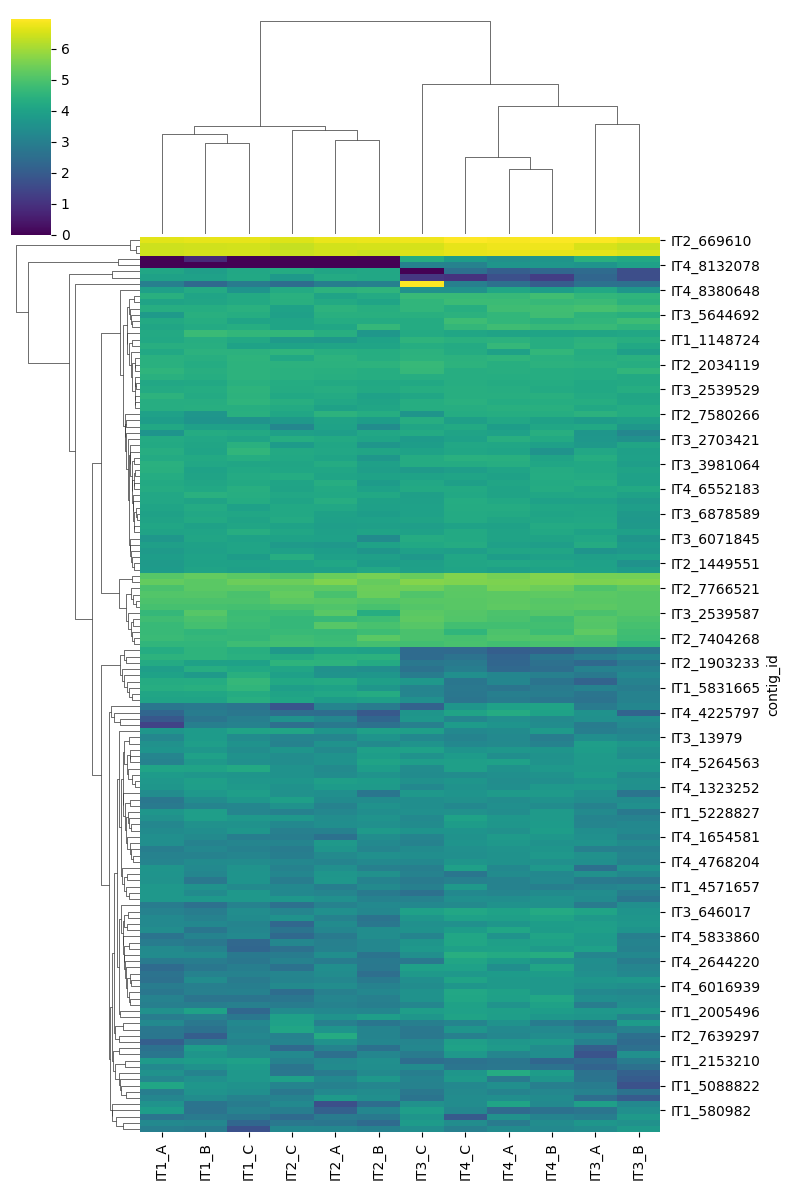

In [9]:
crass = df_tax[df_tax['lineage'] == 'Viruses;Duplodnaviria;Heunggongvirae;Uroviricota;Caudoviricetes;Crassvirales;']
crass = pd.merge(crass, log_trans, how='inner', on=['contig_id'])
crass = crass.set_index('contig_id')
crass = crass.drop(columns='lineage')
crass
sns.clustermap(crass, cmap="viridis", figsize=(8, 12),linecolor='black')
plt.savefig('crass_clustermap.png',dpi=300)

# Calculate correlations between crassphages and environmental data

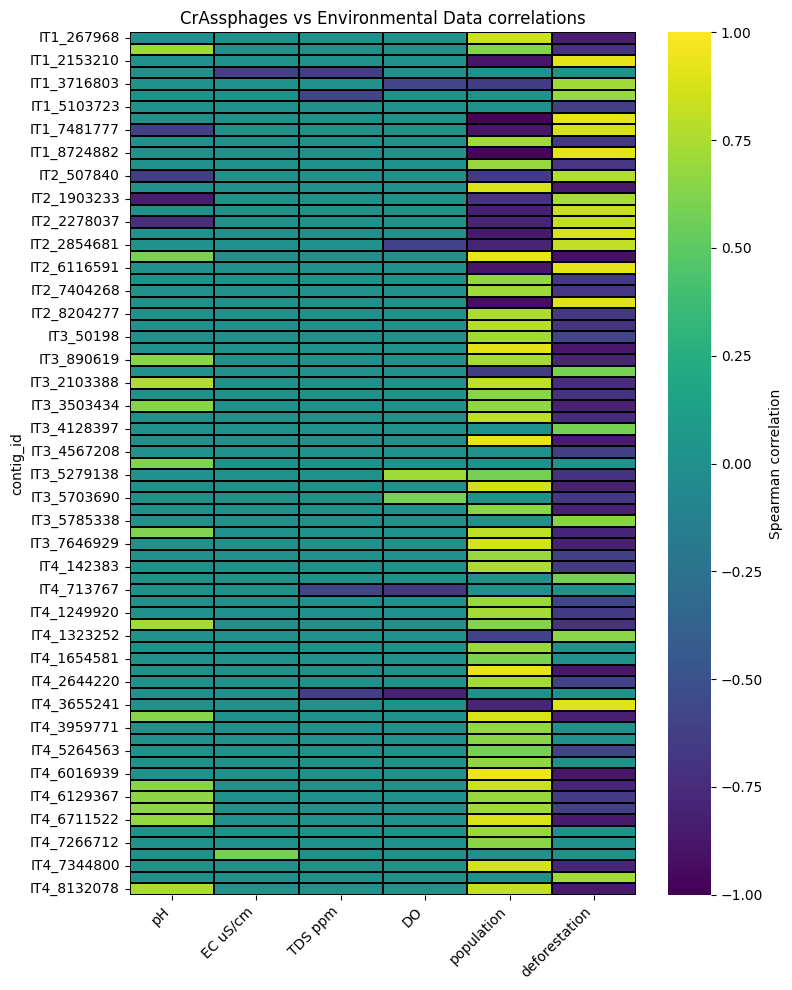

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr

# Load the data
viral_abundances = crass.T

env_data = pd.read_csv('env_data_log_trans.tsv',sep='\t')
env_data = env_data.drop('contig_id', axis=1)

# Initialize a DataFrame to store the correlation coefficients and p-values
correlation_matrix = pd.DataFrame(index=viral_abundances.columns, columns=env_data.columns)
p_value_matrix = pd.DataFrame(index=viral_abundances.columns, columns=env_data.columns)

# Calculate the correlations and p-values
for virus in viral_abundances.columns:
    for env in env_data.columns:
        corr, p_value = spearmanr(viral_abundances[virus], env_data[env])
        correlation_matrix.loc[virus, env] = corr
        p_value_matrix.loc[virus, env] = p_value

# Mask the non-significant correlations (e.g., p-value > 0.05)
significance_mask = p_value_matrix <= 0.05
significant_correlations = correlation_matrix.where(significance_mask)

# Filter to include only viruses with at least one significant correlation
viruses_with_significant_correlations = significant_correlations.dropna(how='all')
viruses_with_significant_correlations = viruses_with_significant_correlations.fillna(0)
#viruses_with_significant_correlations.to_csv('crass_signifficant_correlations.tsv',sep='\t')


# Plot the heatmap
plt.figure(figsize=(8, 10))
sns.heatmap(viruses_with_significant_correlations.astype(float), annot=False, cmap='viridis', vmin=-1, vmax=1, cbar_kws={'label': 'Spearman correlation'},linewidths=0.01, linecolor='black')
plt.title('CrAssphages vs Environmental Data correlations')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.savefig('crass_correlations.png',dpi=300)

# Extract crassphage contigs posetively correlated to population density

In [29]:
pos_pop_coor = viruses_with_significant_correlations[viruses_with_significant_correlations['population'] > 0]
pos_pop_coor = pos_pop_coor.reset_index()
pos_pop_coor = pos_pop_coor[['contig_id']]

it1_pos_pop_coor = pos_pop_coor[pos_pop_coor['contig_id'].str.startswith('IT1')]
it2_pos_pop_coor = pos_pop_coor[pos_pop_coor['contig_id'].str.startswith('IT2')]
it3_pos_pop_coor = pos_pop_coor[pos_pop_coor['contig_id'].str.startswith('IT3')]
it4_pos_pop_coor = pos_pop_coor[pos_pop_coor['contig_id'].str.startswith('IT4')]

#it1_pos_pop_coor.to_csv('../05_annotation_processing/it1_crass_pos_pop_coor.tsv',sep='\t',index=False)
#it2_pos_pop_coor.to_csv('../05_annotation_processing/it1_crass_pos_pop_coor.tsv',sep='\t',index=False)
#it3_pos_pop_coor.to_csv('../05_annotation_processing/it1_crass_pos_pop_coor.tsv',sep='\t',index=False)
#it4_pos_pop_coor.to_csv('../05_annotation_processing/it1_crass_pos_pop_coor.tsv',sep='\t',index=False)